## 機械力学テキスト 12章 ロボットシミュレーション
# プログラム例

### 使用するライブラリの読込

In [11]:
#この枠をクリックしてアクティブにしてから，Shiftを押しながらEnterを押すと，枠内のコードが実行されます．以下同じです．
import numpy as np #数値計算ライブラリ
from scipy.integrate import odeint #常微分方程式ライブラリ
import matplotlib.pyplot as plt #グラフ作成ライブラリ
from matplotlib.animation import FuncAnimation #アニメーションライブラリ
import time #時間操作ライブラリ

### □ 運動方程式（常微分方程式）の定義

#### パラメータ

In [2]:
M = 2/3 #台車の質量
m = 1/3 #振り子の質量
l = 1   #振り子の長さ

#### 運動方程式を1階化した微分方程式

In [3]:
def eom(xx,t):
    x   = xx[0] #台車の変位 ※python は配列の添字が0から
    dx  = xx[1] #台車の速度
    th  = xx[2] #振り子の角度
    dth = xx[3] #振り子の角速度
    
    ft = 0 #制御力
    
    A = np.array(
        [
            [M+m,        m*l*np.cos(th)],
            [np.cos(th), l]
        ]
    )
    
    bb = np.array(
        [m*l*(dth**2)*np.sin(th)+ft, 9.8*np.sin(th)]
    )
    
    A_inv = np.linalg.inv(A) #逆行列
    hh = np.dot(A_inv, bb) #逆行列とベクトルの積
    
    dxx = np.array(
        [dx, hh[0], dth, hh[1]]
    )
    
    return dxx

#### テキストに書き忘れた用語
- <p style="color:red;"> ベクトル xx := (x, dx, th, dth) を **状態ベクトル** という．</p>

### □ 運動方程式の数値解を求める

#### 初期値

In [4]:
xx0 = np.array([0, 0, 0.5, 0])

#### 時間軸を表す等差数列

In [5]:
n = 200 #時刻の数
ts = np.linspace(0, 25, n) #0秒から25秒までn等分

#### 差分解法（数値積分）

In [6]:
xxs = odeint(eom, xx0, ts)
print(xxs) #各行が状態ベクトル，下に向かって時間が進行

[[ 0.00000000e+00  0.00000000e+00  5.00000000e-01  0.00000000e+00]
 [-1.45097140e-02 -2.29475042e-01  5.50313830e-01  8.07669267e-01]
 [-5.64122983e-02 -4.26770304e-01  7.05825770e-01  1.68223777e+00]
 [-1.16346447e-01 -4.92159399e-01  9.76361214e-01  2.63637627e+00]
 [-1.66925480e-01 -2.42464559e-01  1.37147983e+00  3.67371700e+00]
 [-1.54592549e-01  5.49443555e-01  1.90944830e+00  4.96162417e+00]
 [ 6.50731154e-04  1.99395897e+00  2.64381561e+00  6.80806131e+00]
 [ 2.93129173e-01  2.13509016e+00  3.55306781e+00  6.98859576e+00]
 [ 4.66609604e-01  6.67054939e-01  4.31070285e+00  5.11845023e+00]
 [ 4.89264856e-01 -1.91897070e-01  4.86505728e+00  3.78555189e+00]
 [ 4.42077732e-01 -4.84936158e-01  5.27323122e+00  2.73511885e+00]
 [ 3.81461910e-01 -4.41644839e-01  5.55574513e+00  1.77396158e+00]
 [ 3.37135159e-01 -2.51493849e-01  5.72224853e+00  8.91025034e-01]
 [ 3.19761785e-01 -2.31264481e-02  5.78269075e+00  7.90789826e-02]
 [ 3.31395666e-01  2.07198175e-01  5.74245632e+00 -7.25031957e

### □ 数値解の振動波形

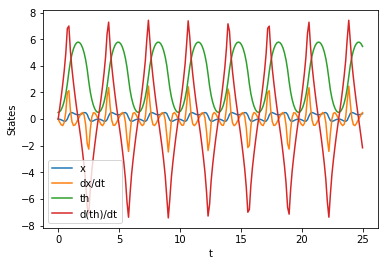

In [8]:
plt.plot(ts,xxs[:,0],label='x')        #台車の変位
plt.plot(ts,xxs[:,1],label='dx/dt')    #台車の速度
plt.plot(ts,xxs[:,2],label='th')       #振り子の角度
plt.plot(ts,xxs[:,3],label='d(th)/dt') #振り子の角速度
plt.xlabel('t')
plt.ylabel('States')
plt.legend()

### □ 数値解のアニメーション

#### アニメーション用のグラフ用紙を用意する

<IPython.core.display.Javascript object>


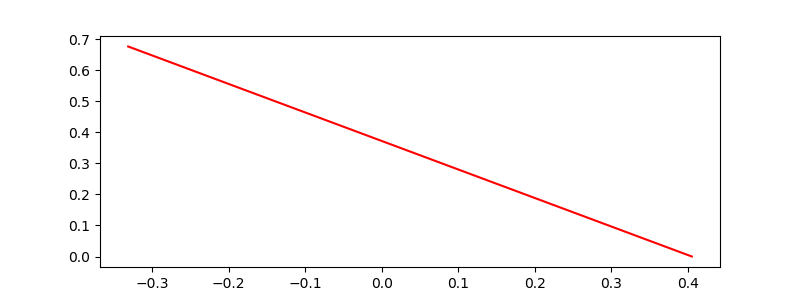

In [13]:
%matplotlib nbagg

### アニメーション用のグラフ用紙を用意する
fig, ax = plt.subplots(figsize=(8,3))
ax.set_xlim(-4,4)      #グラフの縦軸の範囲
ax.set_ylim(-1.5,1.5)  #グラフの横軸の範囲
ax.grid()              #グリッドon
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("xx21xx") #タイトルは学籍番号

### i 行目の状態ベクトルから機構を描画する関数
def update_anim(i):
    x = xxs[i,0]
    th = xxs[i,2]
    #振り子支点の位置ベクトル
    XM = np.array([x, 0])
    #振り子先端の位置ベクトル
    Xm = XM + l*np.array([np.sin(th), np.cos(th)])
    #振り子の線分を描画    
    ax.cla() #グラフを消去してから
    ax.plot([XM[0],Xm[0]],[XM[1],Xm[1]],'r-') #描画

### 試しに0コマ目と5コマ目を描画
update_anim(0)
time.sleep(1)
update_anim(5)

### 試しに0コマ目と5コマ目を描画
anim = FuncAnimation(fig, update_anim, interval=5)
fig.show()

#### i 行目の状態ベクトルから機構を描画する関数